Using device: cuda


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home1/sj799/miniconda3/envs/taupetgen/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

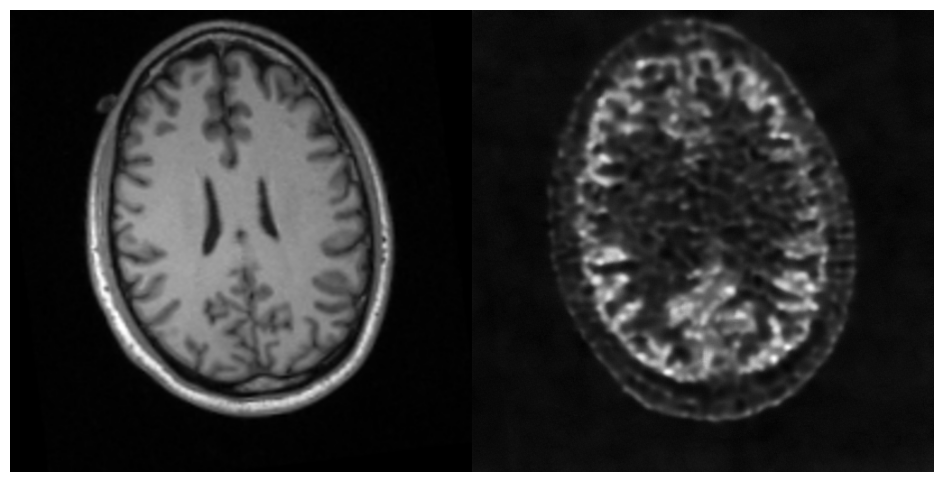

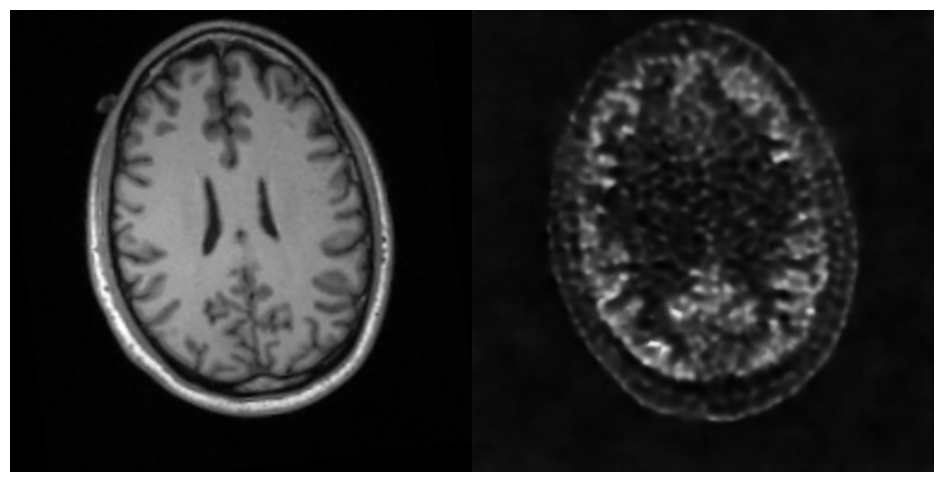

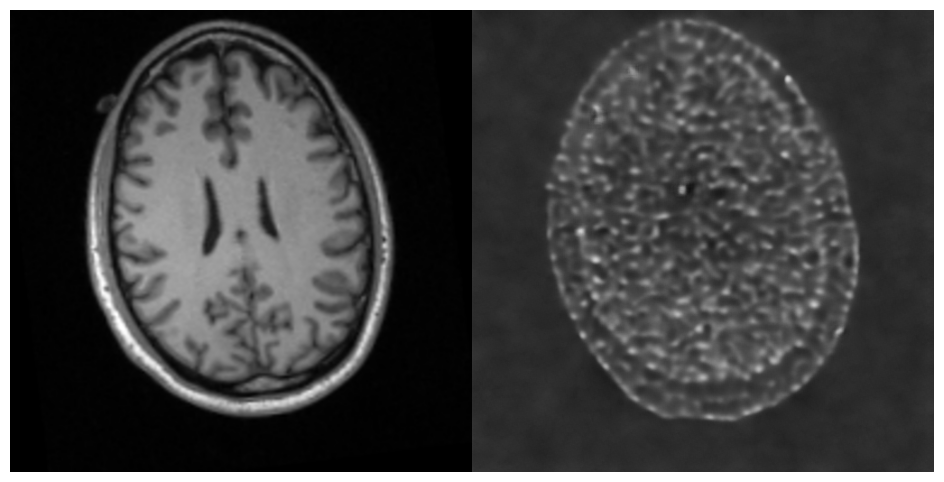

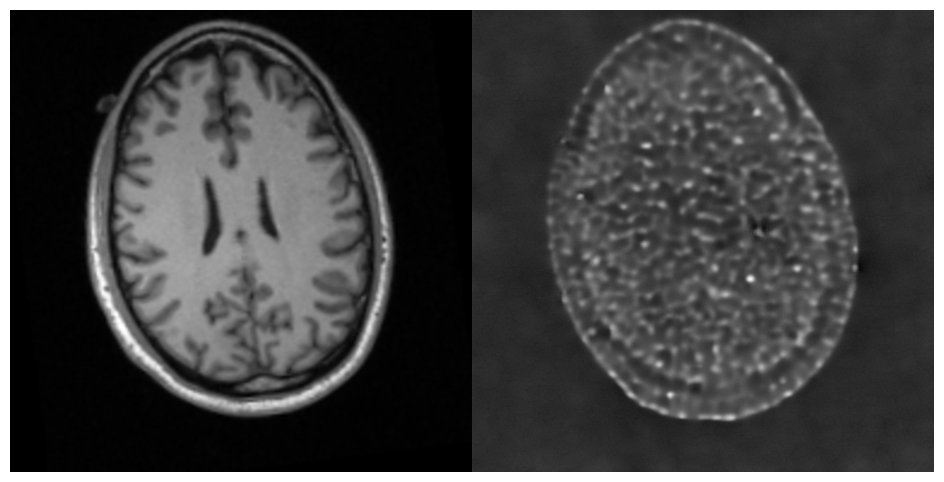

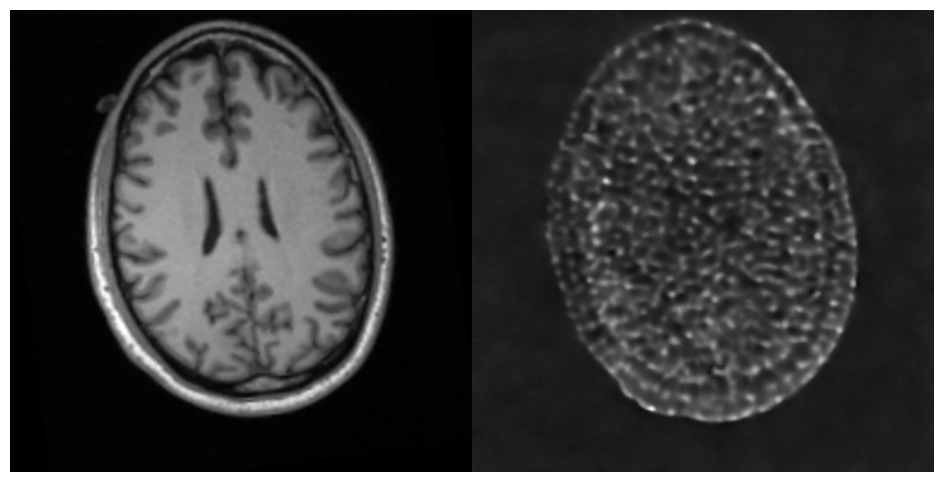

In [1]:
# Cell 1: Imports and setup
import torch
from src.model import setup_model
from src.inference import infer_later_mmse, infer_mr
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

# Cell 2: Model and parameters setup
# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize model and generator
pipe, generator = setup_model(device=device)

# Parameters
image_guidance_scale = 1.5
guidance_scale = 2
num_inference_steps = 10
fileName = "datasets/mr_example1.png"

# Cell 3: Run inference
# Generate images for later stage
infer_later_mmse(pipe, fileName, image_guidance_scale, guidance_scale, num_inference_steps, generator)



  0%|          | 0/10 [00:00<?, ?it/s]

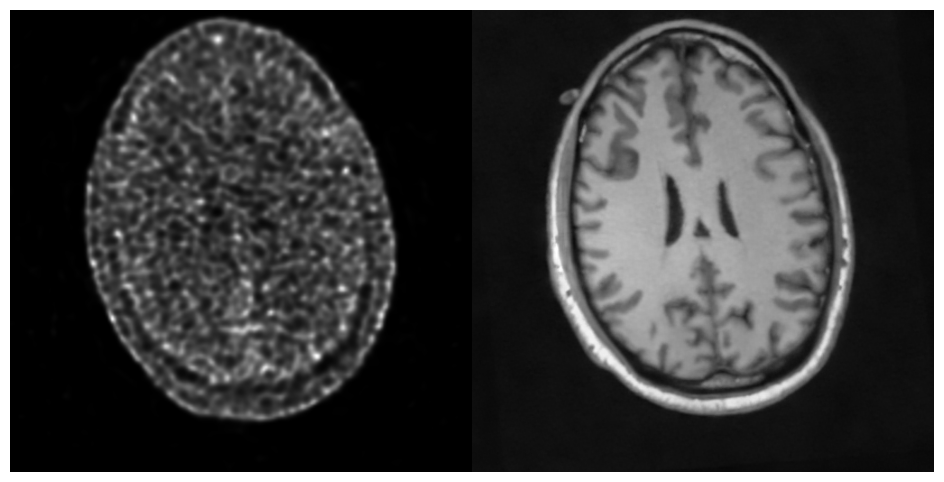

In [3]:
fileName = "datasets/tau_later_example1.png"

# Cell 3: Run inference
# Generate images for later stage
infer_mr(pipe, fileName, image_guidance_scale, guidance_scale, num_inference_steps, generator)



In [ ]:

!accelerate launch --mixed_precision="fp16"  train_text_to_image-instruct.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --train_data_dir="datasets" \
  --use_ema \
  --resolution=512 \
  --train_batch_size=4 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=1000\
  --learning_rate=1e-04 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir="train_save"

/home1/sj799/miniconda3/envs/taupetgen/lib/python3.9/site-packages/accelerate/accelerator.py:249: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
04/07/2025 15:05:24 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'sample_max_value', 'clip_sample_range', 'thresholding', 'prediction_type', 'variance_type', 'dynamic_thresholding_ratio'} was not found in config. Values will be initialized to default values.
{'scaling_factor'} was not found in config. Values will be initialized to default values.
{'time_embedding_act_fn', 'num_class_embeds', 'resnet_skip_time_act', 'class_embed_type', 'conv_out_kernel', 'dual_cross_attention', 'resnet_out_scale_factor', 'mid_block_type', 'time_embedding_type', 'upcast_attention', 'encoder_hid_dim', 'time_cond_proj_dim', 'projection_class_embeddings_input_dim', 'time